In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import matplotlib.image as mpimg
from PIL import Image
import math
from scipy.stats import norm
from numpy.random import random
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import os

In [25]:
N = 50
Q = 10
R = 1
T= 500

In [26]:
def trajectoire(T,Q):
    x_0_T = np.array([0.0 for n in range(T+1)])
    x_0_T[0]=norm.rvs(0,1)
    for i in range(1,T+1):
        xn_1=x_0_T[i-1]
        x_0_T[i]=xn_1*0.5 + 25*xn_1/(1+xn_1**2)+8*np.cos(1.2*i)+norm.rvs(0,Q)
    return x_0_T

In [27]:
def observation(T,R,x_0_T):
    y_0_T=np.array([0.0 for n in range (T+1)])
    for i in range(T+1):
        y_0_T[i]=(x_0_T[i]**2)/20+norm.rvs(0,R)
    return y_0_T

In [41]:
def filtrage_particulaire(N,T):
    Particule=norm.rvs(0,1,N)
    Poids=np.ones(N)/N
    for t in range(T):
        propag=Particule*0.5+25*Particule/(1+Particule**2)+8*np.cos(1.2*t)+norm.rvs(0,Q)
        norm(Yt,mu, sigma**2) avec mu = propag**2 /20 et sigma**2 = R
        
    return Xn,Poids

In [42]:
filtrage_particulaire(N,T)

[29.94911285 27.44917672 31.01574136 30.67160336  5.16048089 30.32476154
 12.84175264 19.23237375 28.69176921  5.10808204  5.13423363 30.42858482
  8.97639035 31.0563259   5.86320552 22.138008    7.74469406 30.90568881
  5.03560942  5.13955856 24.33424238 24.05342825  5.05008062 17.54906934
  9.35588843 28.52314931 30.57715901 31.05300292 27.98842987  5.04286708
 28.06200055 30.91213239  5.33571699 30.91886276  9.39790565  7.46378507
 24.9290176  27.59049595  8.62730826 26.98395079 29.77694977  5.39730107
 23.99679876  5.09535832 28.03526663  9.19143248 16.14720148  8.27540919
  6.10704913  5.64210965]
[23.45614984 20.95621371 24.52277835 24.17864035 -1.33248212 23.83179854
  6.34878963 12.73941074 22.1988062  -1.38488097 -1.35872937 23.93562182
  2.48342735 24.56336289 -0.62975749 15.64504499  1.25173106 24.4127258
 -1.45735359 -1.35340445 17.84127938 17.56046525 -1.44288239 11.05610633
  2.86292542 22.0301863  24.084196   24.56003991 21.49546687 -1.45009593
 21.56903755 24.41916938 -

NameError: name 'Xn' is not defined

In [29]:
def réechantillonnage():
    return None

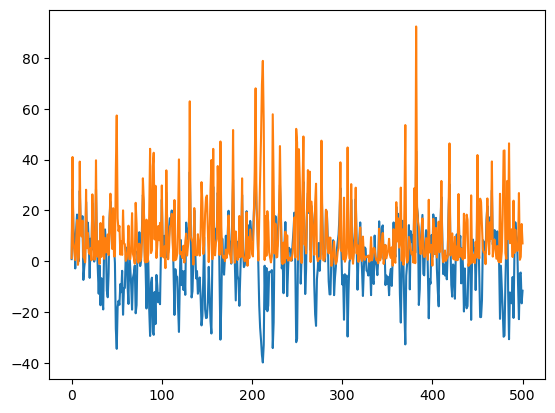

In [31]:
a=trajectoire(T,Q)
b=observation(T,R,a)

plt.plot(a)
plt.plot(b)

In [ ]:
def multinomial_resample(weights):

    weights=weights.T
    cumulative_sum = np.cumsum(weights)
    #cumulative_sum[-1] = 1.  # avoid round-off errors: ensures sum is exactly one
    #print ( np.searchsorted(cumulative_sum, random(len(weights))))
    return np.searchsorted(cumulative_sum, random(len(weights)))


def lecture_image() :

    SEQUENCE = "./sequences/sequence1/"
    #charge le nom des images de la séquence
    filenames = os.listdir(SEQUENCE)
    T = len(filenames)
    #charge la premiere image dans ’im’
    tt = 0

    im=Image.open((str(SEQUENCE)+str(filenames[tt])))
    plt.imshow(im)
    
    return(im,filenames,T,SEQUENCE)

def selectionner_zone() :

    #lecture_image()
    print('Cliquer 4 points dans l image pour definir la zone a suivre.') ;
    zone = np.zeros([2,4])
 #   print(zone))
    compteur=0
    while(compteur != 4):
        res = plt.ginput(1)
        a=res[0]
        #print(type(a)))
        zone[0,compteur] = a[0]
        zone[1,compteur] = a[1]   
        plt.plot(a[0],a[1],marker='X',color='red') 
        compteur = compteur+1 

    #print(zone)
    newzone = np.zeros([2,4])
    newzone[0, :] = np.sort(zone[0, :]) 
    newzone[1, :] = np.sort(zone[1, :])
    
    zoneAT = np.zeros([4])
    zoneAT[0] = newzone[0,0]
    zoneAT[1] = newzone[1,0]
    zoneAT[2] = newzone[0,3]-newzone[0,0] 
    zoneAT[3] = newzone[1,3]-newzone[1,0] 
    #affichage du rectangle
    #print(zoneAT)
    xy=(zoneAT[0],zoneAT[1])
    rect=ptch.Rectangle(xy,zoneAT[2],zoneAT[3],linewidth=3,edgecolor='red',facecolor='None') 
    #plt.Rectangle(zoneAT[0:1],zoneAT[2],zoneAT[3])
    currentAxis = plt.gca()
    currentAxis.add_patch(rect)
    plt.show(block=False)
    return(zoneAT)


def rgb2ind(im,nb) :
    #nb = nombre de couleurs ou kmeans qui contient la carte de couleur de l'image de référence
    print(im)
    image=np.array(im,dtype=np.float64)/255
    w,h,d=original_shape=tuple(image.shape)
    image_array=np.reshape(image,(w*h,d))
    image_array_sample=shuffle(image_array,random_state=0)[:1000]
    print(image_array_sample.shape)
   # print(type(image_array))
    if type(nb)==int :
        kmeans=KMeans(n_clusters=nb,random_state=0).fit(image_array_sample)
    else :
        kmeans=nb
            
    labels=kmeans.predict(image_array)
    #print(labels)
    image=recreate_image(kmeans.cluster_centers_,labels,w,h)
    #print(image)
    return(Image.fromarray(image.astype('uint8')),kmeans)


def recreate_image(codebook,labels,w,h):
    d=codebook.shape[1]
    #image=np.zeros((w,h,d))
    image=np.zeros((w,h))
    label_idx=0
    for i in range(w):
        for j in range(h):
            #image[i][j]=codebook[labels[label_idx]]*255
            image[i][j]=labels[label_idx]
            #print(image[i][j])
            label_idx+=1

    return image


def calcul_histogramme(im,zoneAT,Nb):

  #  print(zoneAT)
    box=(zoneAT[0],zoneAT[1],zoneAT[0]+zoneAT[2],zoneAT[1]+zoneAT[3])
   # print(box)
    littleim = im.crop(box)
##    plt.imshow(littleim)
##    plt.show()
    new_im,kmeans= rgb2ind(littleim,Nb)
    histogramme=np.asarray(new_im.histogram())
##  print(histogramme)
    histogramme=histogramme/np.sum(histogramme)
  #  print(new_im)
    return (new_im,kmeans,histogramme)

In [ ]:
N=100
Nb=20
ecart_type=np.sqrt(50)
lambda_im=60
c1=900
c2=900
C=np.diag([c1,c2])  

[im,filenames,T,SEQUENCE]=lecture_image()   
zoneAT=selectionner_zone()
new_im,kmeans,histo_ref=calcul_histogramme(im,zoneAT,Nb)